In [1]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Groceries_dataset.csv")
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\forda\AppData\Local\Temp\ipykernel_29884\1854287431.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])



# **Top 10 sold items in the dataset**


---


### **Observations :-**



1.   Whole milk is the most sold item, with around 2500 units sold.


    .   It is significantly higher than all other items.
    .   This suggests that milk is a staple product and appears in most customer baskets.



2.   Other vegetables rank second, with approximately 1900 units sold.

    .   This reflects a strong demand for fresh produce.

3.   Rolls/buns, soda, and yogurt are the next top items, showing that bakery and dairy items are popular everyday purchases.

4.   Root vegetables and tropical fruits also appear in the list, suggesting a preference for fresh and diverse food items.

5.   Bottled water, sausage, and citrus fruit occupy the lower positions among the top 10.




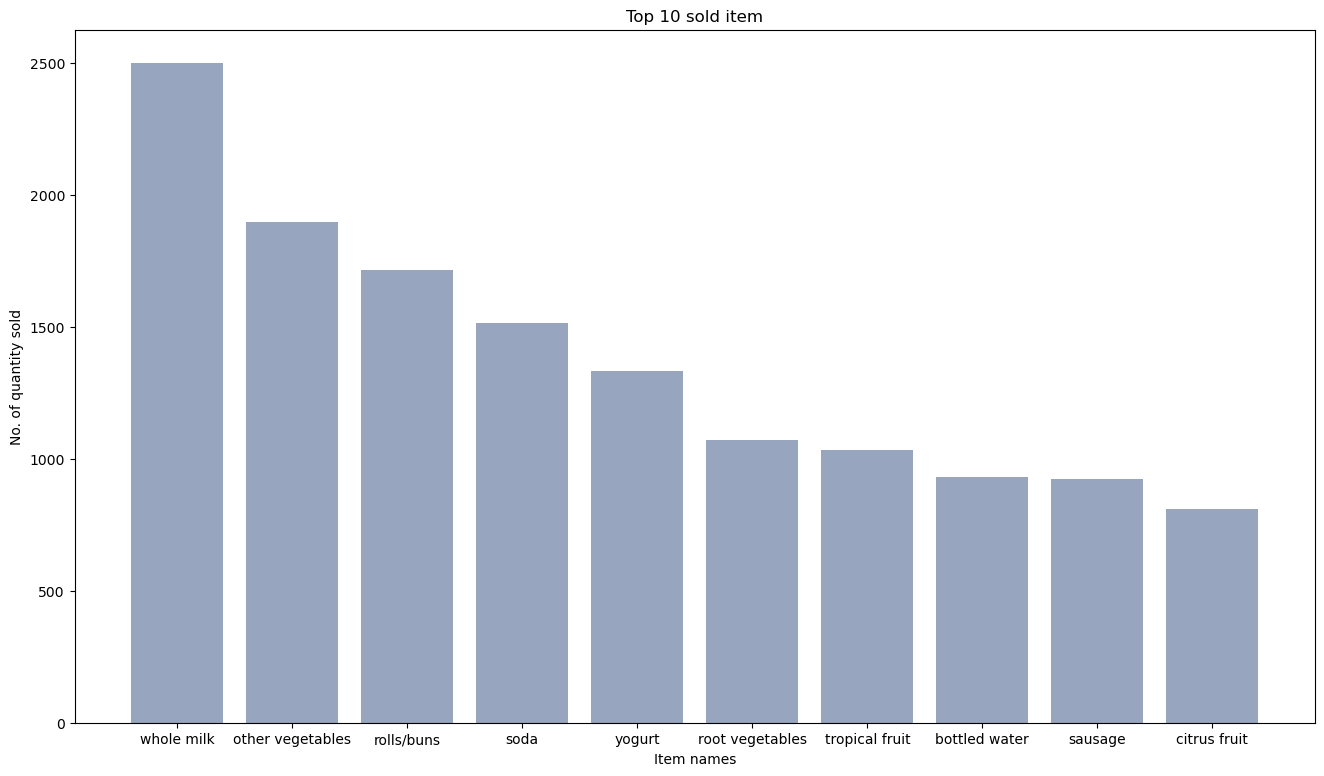

In [7]:
Item_distr=df.groupby(by='itemDescription').size().reset_index(name='frequency').sort_values(by='frequency',ascending=False).head(10)

bars=Item_distr["itemDescription"]
height=Item_distr["frequency"]

x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title("Top 10 sold item")
plt.xlabel("Item names")
plt.ylabel("No. of quantity sold")

plt.xticks(x_pos,bars)
plt.show()

In [8]:
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


# **Number of items sold by Month**


---


### **Observations :-**



1.   Fluctuating sales pattern :

    .   Around February–March 2014, sales dropped to nearly 1400 items — possibly due to post-holiday slowdowns or low seasonal demand.

  

2.   Lowest sales periods :

    .   This reflects a strong demand for fresh produce.
    .   A similar dip is seen around late 2015, indicating cyclical low-demand months.

3.   Strong sales growth :

    .   A noticeable spike occurs around January 2015, reaching nearly 1800 items sold — one of the first major peaks.

    .   Another sharp increase appears around August–September 2015, peaking at over 1900 items, marking the highest sales period in the dataset.

4.   End of 2015 to early 2016 :

    .   After the 2015 peak, sales decline sharply again, showing cyclical seasonality in purchasing behavior.


[Text(0.5, 0, 'date'), Text(0, 0.5, 'no. of items sold')]

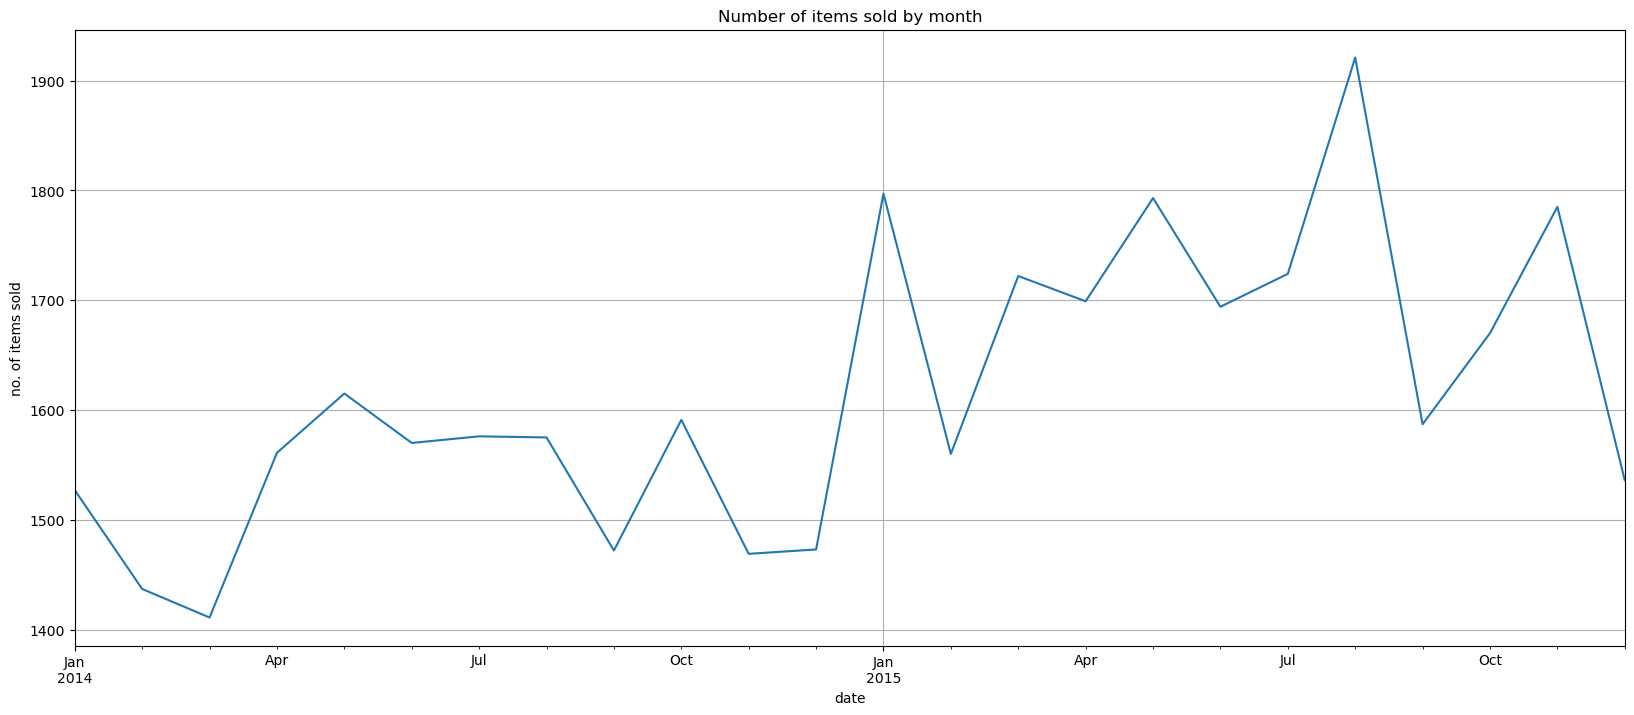

In [9]:
df_date.resample("ME")["itemDescription"].count().plot(figsize=(20,8),grid=True,title="Number of items sold by month").set(xlabel="date",ylabel="no. of items sold")

In [10]:
cust_level=df[['Member_number','itemDescription']].sort_values(by="Member_number",ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

 

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]



In [12]:
from apyori import apriori
rules = apriori(transactions= transactions, min_support = 0.02,min_confidence=0.3,min_lift=1.2,min_length=2)


In [ ]:
results=list(rules)

In [14]:
results


[RelationRecord(items=frozenset({'other vegetables', 'UHT-milk'}), support=0.038994356080041044, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'other vegetables'}), confidence=0.4967320261437908, lift=1.318979181136578)]),
 RelationRecord(items=frozenset({'berries', 'other vegetables'}), support=0.03694202154951257, ordered_statistics=[OrderedStatistic(items_base=frozenset({'berries'}), items_add=frozenset({'other vegetables'}), confidence=0.46302250803858525, lift=1.2294698476392407)]),
 RelationRecord(items=frozenset({'other vegetables', 'beverages'}), support=0.028732683427398667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beverages'}), items_add=frozenset({'other vegetables'}), confidence=0.4628099173553719, lift=1.2289053527597)]),
 RelationRecord(items=frozenset({'soda', 'beverages'}), support=0.02616726526423807, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beverages'}), items_add=frozenset({'soda'})

In [15]:

def inspect(results):
  lhs = []
  rhs = []
  supports = []
  confidences = []
  lifts = []
  for result in results:
    if result[2]:
      for ordered_stat in result[2]:

        if ordered_stat[0]:
          lhs.append(tuple(ordered_stat[0])[0])
        else:
          lhs.append('')

        if ordered_stat[1]:
          rhs.append(tuple(ordered_stat[1])[0])
        else:
          rhs.append('')
        supports.append(result[1])
        confidences.append(ordered_stat[2])
        lifts.append(ordered_stat[3])
  return list(zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidences','Lift'])




In [16]:
resultsindataframe.nlargest(n=10,columns="Confidences")

,Left Hand Side,Right Hand Side,Support,Confidences,Lift
404,yogurt,whole milk,0.022063,0.682540,1.489664
70,shopping bags,whole milk,0.020010,0.661017,1.442690
432,yogurt,whole milk,0.034377,0.656863,1.433623
145,shopping bags,whole milk,0.022063,0.656489,1.432806
444,yogurt,whole milk,0.027963,0.648810,1.416047
448,yogurt,whole milk,0.021293,0.648438,1.415235
407,rolls/buns,whole milk,0.020780,0.642857,1.403056
417,shopping bags,whole milk,0.021036,0.640625,1.398184
456,rolls/buns,whole milk,0.022832,0.640288,1.397448
195,yogurt,whole milk,0.025398,0.630573,1.376246
